<h1>Housing Number Digits Recognition by Using Convolutional Neural Networks (CNNs)</h1>

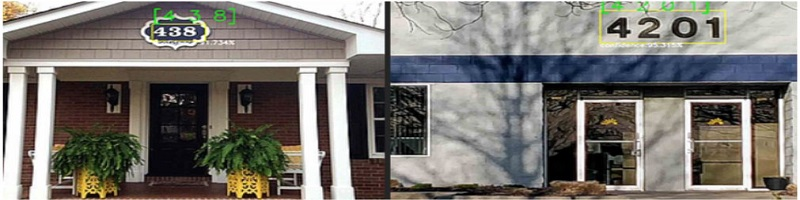

<h1>Index </h1>

### [1. Context](#context)
### [2. Objective](#objective)
### [3. Dataset](#dataset)
### [4. Notebook Error Handling Solution](#Notebook_Error_Handling_Solution)
### [5. Importing Required Library](#Importing_Required_Library)
### [6. Important Library Overview](#Important_Library_Overview)
### [7. Dataset Import, Visualization and Preprocessing](#Dataset_Import_Visualization_and_Preprocessing)
### [8. Create CNN Model, Validation and Accuracy vs los Visualization](#Create_CNN_Model)
### [9. Best Model's Accuracy and loss visualization](#Best_Model)
### [10. Model Save, load and Confusion Matrix analysis](#Model_Save)
### [11. Conclusion](#conclusion)

<a id ="context"> </a>
# 1. Context:

<p><mark style="background-color: white; color: black;"><font size="4"> Recognizing things in their natural settings is one of the most fascinating challenges in the field of deep learning. The capacity to analyze visual information using machine learning algorithms may be highly valuable, as shown by a variety of applications.</font></mark></p>
<p><mark style="background-color: white; color: black;"><font size="4">The <mark>SVHN </mark>dataset includes approximately <mark>600,000 digits </mark>that have been identified and were clipped from street-level photographs. It is one of the image recognition datasets that is used the most often. It has been put to use in the neural networks that Google has developed in order to enhance the quality of maps by automatically trancribing address numbers from individual pixel clusters. The combination of the transcribed number and the known street address makes it easier to locate the building that the number represents.</font></mark></p>

<a id ="objective"> </a>
# 2. Objective:

<p><mark style="background-color: white; color: black;"><font size="4"> The objective of the project is to learn how to implement a <mark>Develop a CNN (Convolutional Neural Networks) </mark> model that is capable of Street View Housing Number Digits Recognition that are shown in the photos and understand the basics of Image Classification.</font></mark></p>

<a id ="dataset"> </a>
# 3. Dataset:

<p><mark style="background-color: white; color: black;"><font size="4"> SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. </font></mark></p>

<a id ="Notebook_Error_Handling_Solution"> </a>
# 4. Notebook Error Handling Solution

In [4]:
# If notebook give any error then you can try following one by one.

# !pip install scikit-learn
# !pip install opencv-python-headless
# !pip install opencv-python
# import site
# site.getsitepackages()
#pip install wheel-name.whl
#!pip install --upgrade pip
#-----or-----
# import sys
# sys.path.append('<extra paths found in terminal but not in Jupyter, separated by commas>')
#-----or-----
# !apt-get update && apt-get install -y python3-opencv
# !pip install opencv-python
# !pip install scikit-learn

<a id ="Importing_Required_Library"> </a>
# 5. Importing Required Library

In [5]:
#Importing required library
import os
import h5py    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image

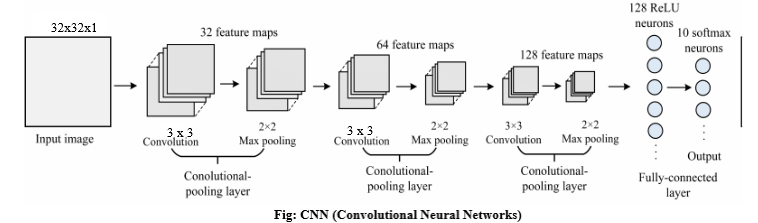

<p><mark style="background-color: white; color: black;"><font size="4">To understand the basics of image classification, it's important to understand the concepts of convolutional neural networks (CNNs), which are commonly used for image classification tasks. CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. Convolutional layers are responsible for detecting features in images, and pooling layers are used to down-sample the image and reduce the number of parameters.</font></mark></p>
<p><mark style="background-color: white; color: black;"><font size="4">Fully connected layers are used to make predictions based on the features detected by the convolutional and pooling layers.</font></mark></p>

<a id ="Important_Library_Overview"> </a>
# 6. Important Library Overview

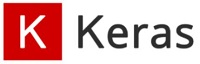

<p><mark style="background-color: white; color: black;"><font size="4"> Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
    It was developed with a focus on enabling fast experimentation. Being user-friendly, modular, and extensible, Keras allows for easy and fast prototyping (through user friendliness, modularity, and extensibility). 
    It supports both convolutional networks and recurrent networks, as well as combinations of the two. </font></mark> </p>

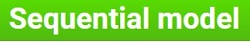

<p> <mark style="background-color: white; color: black;"><font size="4">  A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.</font></mark>  </p>
<p><mark style="background-color: white; color: black;"> <font size="4">The Sequential model is a linear stack of layers in Keras. It is the easiest way to create a model in Keras. It allows you to build a model layer by layer, where each layer has weights that correspond to the layer that follows it. The Sequential model is a linear stack of layers, where you can add one layer at a time. It is designed to make it easy to build deep learning models. It is also very flexible, allowing you to add or remove layers and change their configuration easily. The model needs to be compiled before training and prediction, in which we specify the optimizer, loss function and metrics. Once compiled, the model can be trained using the fit() method and predictions can be made using the predict() method. </font> <p></mark> 

<h1> <mark style="background-color: #A2BB05; color: white;">  <b>Dropout <b></mark><h1>

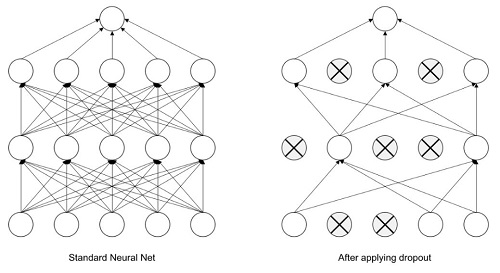

* <p> <mark style="background-color: white; color: black;"><font size="4">Dropout is a technique used in neural networks to prevent overfitting. Overfitting occurs when a model becomes too complex and starts to memorize the training data instead of generalizing to new unseen data. Dropout is a regularization technique that works by randomly dropping out (i.e., setting to zero) a certain percentage of neurons during training. </font> <p></mark> 

* <p> <mark style="background-color: white; color: black;"><font size="4">The dropout rate is a hyperparameter that determines the percentage of neurons to drop out. A common value for the dropout rate is 0.5, which means that during each training step, half of the neurons in the layer are dropped out. Dropping out neurons helps to break the co-adaptation between neurons and reduce overfitting. </font> <p></mark> 

* <p> <mark style="background-color: white; color: black;"><font size="4">Dropout works by effectively averaging multiple models with different subsets of the neurons. During training, each neuron can be thought of as a model. When dropout is applied, some neurons are dropped out and not used in the forward pass, effectively training multiple models. During testing, dropout is not applied, and all neurons are used. The outputs of all neurons are combined to make a prediction. </font> <p></mark> 

* <p> <mark style="background-color: white; color: black;"><font size="4">It's important to note that dropout is typically applied to fully connected layers, as it's less effective on convolutional layers. Also, the dropout rate needs to be tuned and the optimal value may vary depending on the specific dataset and task. </font> <p></mark> 

<h1> <mark style="background-color: #A2BB05; color: white;">  <b>Batch Normalization()</b></mark></h1>

* <p> <mark style="background-color: white; color: black;"><font size="4">Batch normalization is a technique used to improve the stability and performance of neural networks by normalizing the activations of the layers. Batch normalization works by normalizing the activations of a layer by subtracting the mean and dividing by the standard deviation of the activations, computed over a mini-batch of data. This helps to stabilize the training process and improve the model's generalization performance. </font> </mark> </p>

* <p> <mark style="background-color: white; color: black;"><font size="4">There are no specific requirements for using batch normalization in a model, but it is often used in deep neural networks to speed up the training process. Batch normalization can be added to any type of layer, but it is most commonly applied to the layers before the activation function, typically after the convolutional layers or fully connected layers. </font> </mark> </p>

* <p> <mark style="background-color: white; color: black;"><font size="4">Batch normalization can be beneficial in some cases, but it's not always necessary. It depends on the dataset and the model. Batch normalization can help to improve the stability and performance of a neural network but it can also add complexity to the model. It's worth noting that if the dataset is small or the model is simple, batch normalization may not be necessary and other regularization methods may work better. </font></mark> </p> 

* <p> <mark style="background-color: white; color: black;"><font size="4">It's important to note that Batch Normalization is used during the training phase, but the mean and standard deviation of the activations are computed over a mini-batch of data, it's not the same as normalizing the input data, it's used to normalize the activations of the layers. </font></mark> </p> 

<h1> <mark style="background-color: #A2BB05; color: white;">  <b>Keras ImageDataGenerator</b></mark></h1>

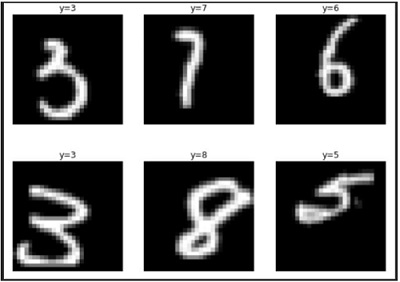

<p> <mark style="background-color: white; color: black;"><font size="4">ImageDataGenerator is a class in Keras that allows you to easily preprocess image data. It can be used to augment the training data by applying random transformations to the images, such as random rotations, translations, and flips. This can help to improve the performance of a model by making it more robust to changes in the input data.</font> <p></mark> 

<p> <mark style="background-color: white; color: black;"><font size="4">It takes the directory path of the data and generates batches of augmented data for training. The generator can automatically resize the images, rescale the pixel values, and apply random transformations. It can also perform data augmentation, such as random horizontal flips, vertical flips, rotations, and more.</font> <p></mark> 

<p> <mark style="background-color: white; color: black;"><font size="4">The ImageDataGenerator class has several useful methods, such as flow_from_directory and flow, which are used to generate batches of data from a directory of images. The flow_from_directory method automatically detects the class labels from the directory structure and converts them into one-hot encoded vectors. The flow method can be used to generate batches of data from any data source, such as a numpy array.</font> <p></mark> 

<p> <mark style="background-color: white; color: black;"><font size="4">It is a very useful class in deep learning as it allows to handle a large amount of data and perform data augmentation, it also speeds up the process of training by providing the data in batches and preprocessing it on the fly.</font> <p></mark> 

<a id ="Dataset_Import_Visualization_and_Preprocessing"> </a>
# 7. Dataset Import, Visualization and Preprocessing

In [6]:
filepath="/kaggle/input/street-view-house-nos-h5-file/SVHN_single_grey1.h5"
df= h5py.File(filepath,'r') #read hd5 file
dataframe=np.array(df)
ls=list(dataframe)
print("List of datasets in this file: \n",ls)
  
X_test = np.array(df['X_test'])
X_train = np.array(df['X_train'])
X_val = np.array(df['X_val'])

y_test = np.array(df['y_test'])
y_train = np.array(df['y_train'])
y_val = np.array(df['y_val'])
print("Shape of X_train: \n",X_train.shape)
print("Shape of y_train: \n",y_train.shape)
print("Shape of X_test: \n",X_test.shape)
print("Shape of y_test: \n",y_test.shape)
print("Shape of X_val: \n",X_val.shape)
print("Shape of y_val: \n",y_val.shape) 

List of datasets in this file: 
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_train: 
 (42000, 32, 32)
Shape of y_train: 
 (42000,)
Shape of X_test: 
 (18000, 32, 32)
Shape of y_test: 
 (18000,)
Shape of X_val: 
 (60000, 32, 32)
Shape of y_val: 
 (60000,)


### Data Defination:
* X_train Data volume= 42000 and size= 32x32 pixel
* X_test Data volume= 18000 and size= 32x32 pixel
* X_val Data volume= 60000 and size= 32x32 pixel


## 7.1 Data Visualization

#### Plotting Distribution of Data

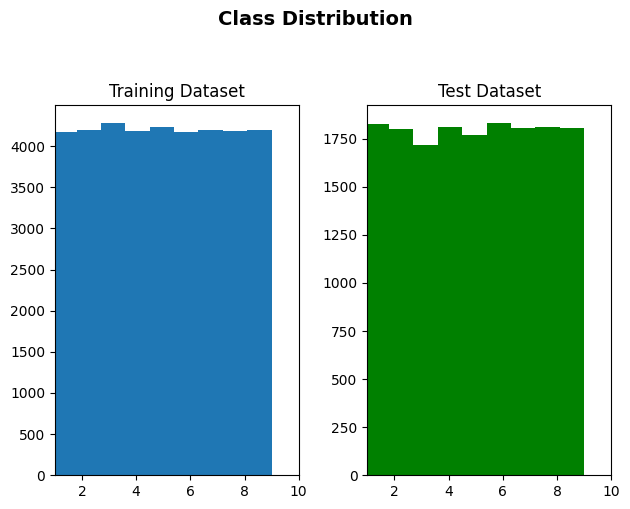

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test Dataset")

fig.tight_layout()

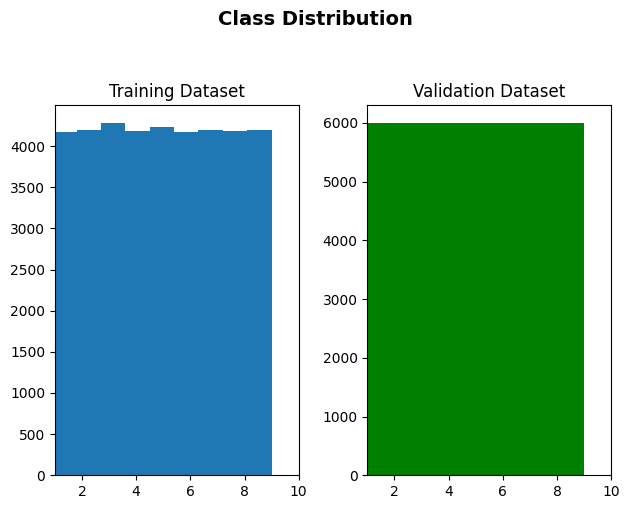

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Dataset")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation Dataset")

fig.tight_layout()

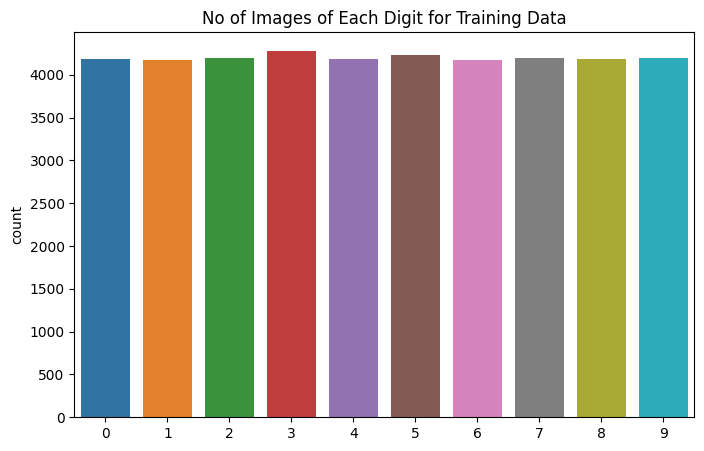

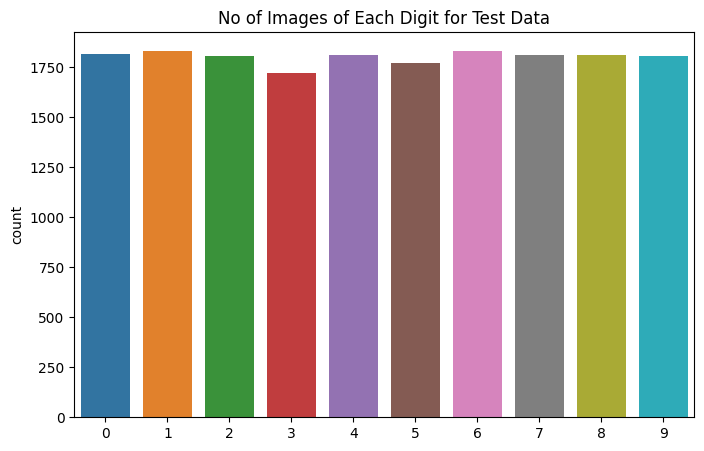

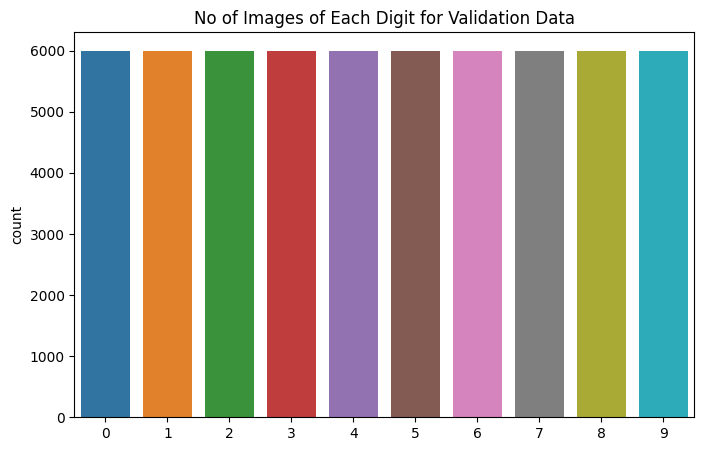

In [9]:
ax1 = plt.subplots(figsize=(8,5))
ax1 = sns.countplot(x=y_train)

ax1.set_title("No of Images of Each Digit for Training Data")

ax2 = plt.subplots(figsize=(8,5))
ax2 = sns.countplot(x=y_test)

ax2.set_title("No of Images of Each Digit for Test Data")

ax3 = plt.subplots(figsize=(8,5))
ax3 = sns.countplot(x=y_val)

ax3.set_title("No of Images of Each Digit for Validation Data")
plt.show()

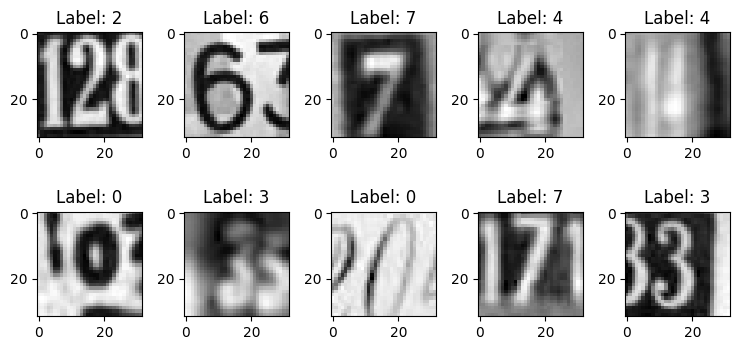

In [10]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()

In [11]:
X_train.shape

(42000, 32, 32)

In [12]:
y_train.shape

(42000,)

In [13]:
y_train[1]

6

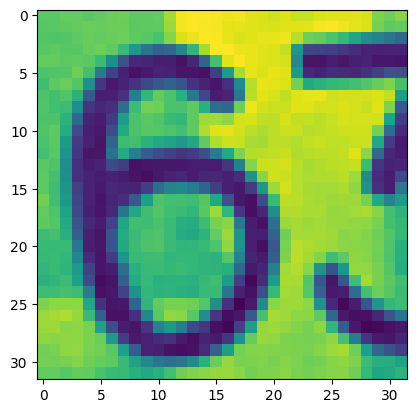

In [14]:
plt.imshow(X_train[1])

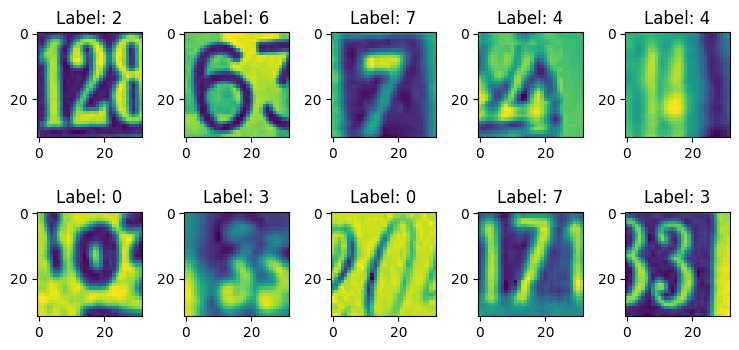

In [15]:
num_row = 2
num_col = 5
fig,axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row)) 
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i])
    ax.set_title('Label: {}'.format(y_train[i]))
    plt.tight_layout() 
    
plt.show()

In [16]:
y_train.shape

(42000,)

In [17]:
# Display the training and predicted data
def plot_images(img,labels,nrows,ncols,pred_labels=None):
    fig = plt.figure(figsize = (25,10));
    axes = fig.subplots(nrows,ncols)
    for i, ax in enumerate(axes.flat):
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        if pred_labels is None:
            ax.set_title('True: %d' % labels[i])
        else:
            ax.set_title('True: {0}, Pred: {1}'.format(labels[i], np.argmax(pred_labels[i])))


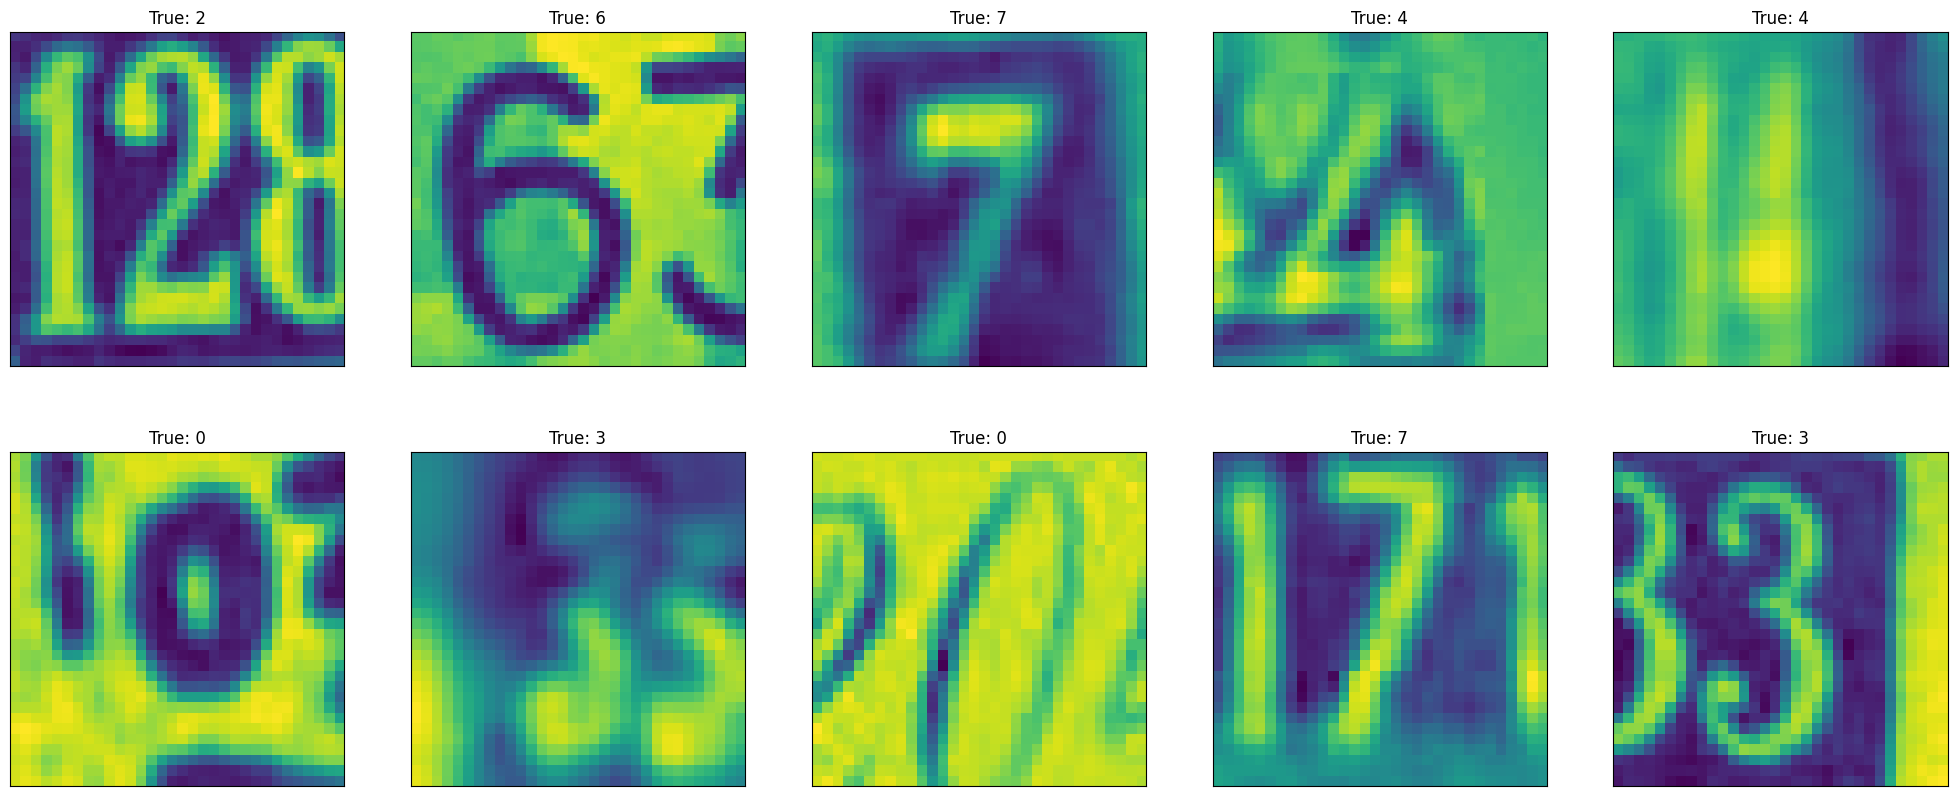

In [18]:
plot_images(X_train, y_train, 2, 5)

## 7.2 Data Preprocessing

### Normalization 

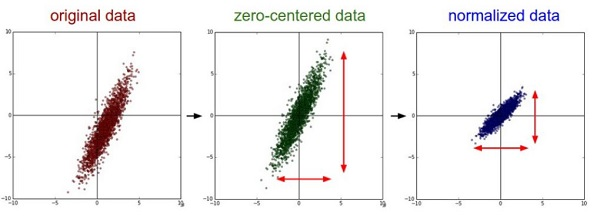

In [19]:
import numpy as np
x_train = np.expand_dims(X_train, axis=-1) # <--- add channel axis
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1) # <--- add channel axis
x_val = x_val.astype('float32') /255
x_test = np.expand_dims(X_test, axis=-1) # <--- add channel axis
x_test = x_test.astype('float32') /255
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)


### Converting labels to categorical data

In [20]:
y_train=keras.utils.to_categorical(y_train)
y_val=keras.utils.to_categorical(y_val)
y_test=keras.utils.to_categorical(y_test)

print("Shape of ytrain:",y_train.shape)
print("Shape of yval:",y_val.shape)
print("Shape of ytest:",y_test.shape)

Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


In [21]:
print(np.unique(X_train))

[0.000000e+00 1.140000e-01 2.280000e-01 ... 2.547465e+02 2.548605e+02
 2.549745e+02]


In [22]:
np.unique(y_train)

array([0., 1.])

In [23]:
X_train.shape

(42000, 32, 32)

In [24]:
x_train.shape

(42000, 32, 32, 1)

<a id ="Create_CNN_Model"> </a>
# 8. Create CNN Model, Validation and Accuracy vs los Visualization

## 8.1. Primary Model

In [25]:
num_classes = 10      # Number of classes to model

# Define the model
primary_model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 1)),  
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32, kernel_size=(3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(512),
    Activation('relu'),
    Dropout(0.3),
    
    Dense(128),
    Activation('relu'),
    Dropout(0.1),
    
    Dense(num_classes, activation='softmax')])

primary_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [26]:
primary_model_history = primary_model.fit(x=x_train, y=y_train,
                                          validation_data=(x_val, y_val),
                                          batch_size=32,
                                          epochs=20,
                                          verbose=1)
                   

Epoch 1/20


I0000 00:00:1728038739.756474     124 service.cc:145] XLA service 0x5a8b8c1537a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728038739.756527     124 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  65/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0987 - loss: 2.3052

I0000 00:00:1728038744.690662     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2194 - loss: 2.0539 - val_accuracy: 0.7346 - val_loss: 0.8169
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7719 - loss: 0.7203 - val_accuracy: 0.8353 - val_loss: 0.5148
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8355 - loss: 0.5236 - val_accuracy: 0.8621 - val_loss: 0.4381
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8591 - loss: 0.4532 - val_accuracy: 0.8836 - val_loss: 0.3721
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8716 - loss: 0.4107 - val_accuracy: 0.8893 - val_loss: 0.3496
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8833 - loss: 0.3738 - val_accuracy: 0.8856 - val_loss: 0.3647
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8895 - loss: 0.3550 - val_accuracy: 0.9036 - val_loss: 0.3135
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8956 - loss: 0.3354 - val_accura

## 8.2. Accuracy and Loss Visualization for 1st model

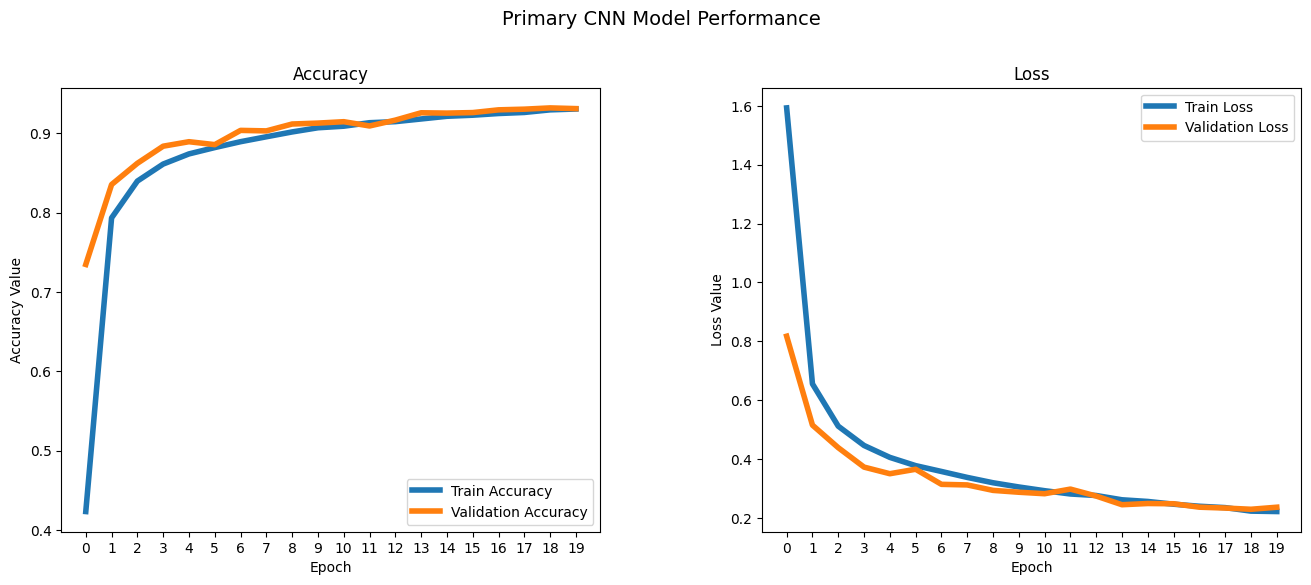

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('Primary CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, primary_model_history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, primary_model_history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, primary_model_history.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, primary_model_history.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## 8.3. Model Test, number Prediction and accuracy visualization

In [28]:
primary_model_scores = primary_model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (primary_model.metrics_names[1], primary_model_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.3630
TEST SET: compile_metrics: 89.76%


In [29]:
test_predictions = primary_model.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


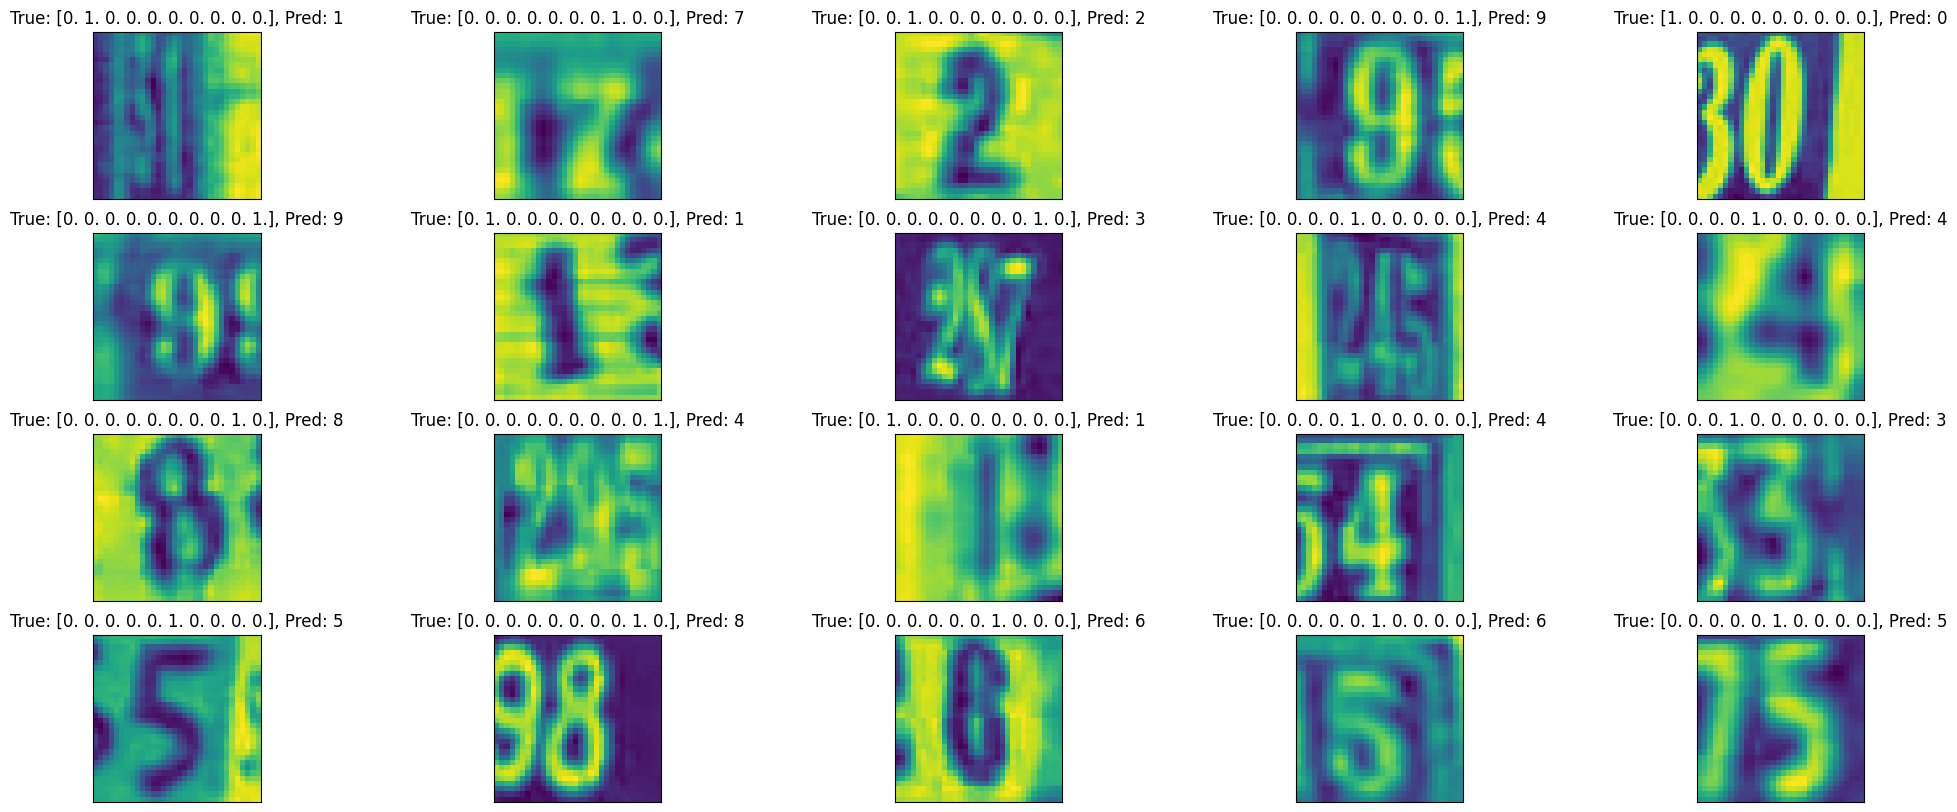

In [30]:
plot_images(x_test, y_test, 4, 5, test_predictions)

## 8.4. 2nd Model Using Batch Normalization

In [31]:
# Define the model
model1 = Sequential()

# Add convolutional layers
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))

# Add Flatten layers
model1.add(Flatten())
model1.add(Dropout(0.3))

# Add dense layers
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer

# Add dense layers
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer
model1.add(Dropout(0.2))

# Add the output layer
model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,274 (215.91 KB)

 Trainable params: 54,698 (213.66 KB)

 Non-trainable params: 576 (2.25 KB)

In [33]:
history1 = model1.fit(x=x_train, y=y_train,
                   validation_data=(x_val, y_val),
                   batch_size=32,
                   epochs=20,
                   verbose=1)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3961 - loss: 1.8272 - val_accuracy: 0.8180 - val_loss: 0.5839
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7909 - loss: 0.6707 - val_accuracy: 0.8680 - val_loss: 0.4322
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8324 - loss: 0.5418 - val_accuracy: 0.8596 - val_loss: 0.4496
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8489 - loss: 0.4801 - val_accuracy: 0.8875 - val_loss: 0.3759
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8659 - loss: 0.4439 - val_accuracy: 0.8996 - val_loss: 0.3287
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8671 - loss: 0.4300 - val_accuracy: 0.9022 - val_loss: 0.3176
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8810 - loss: 0.3892 - val_accuracy: 0.9176 - val_loss: 0.2734
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8850 - loss: 0.3766 -

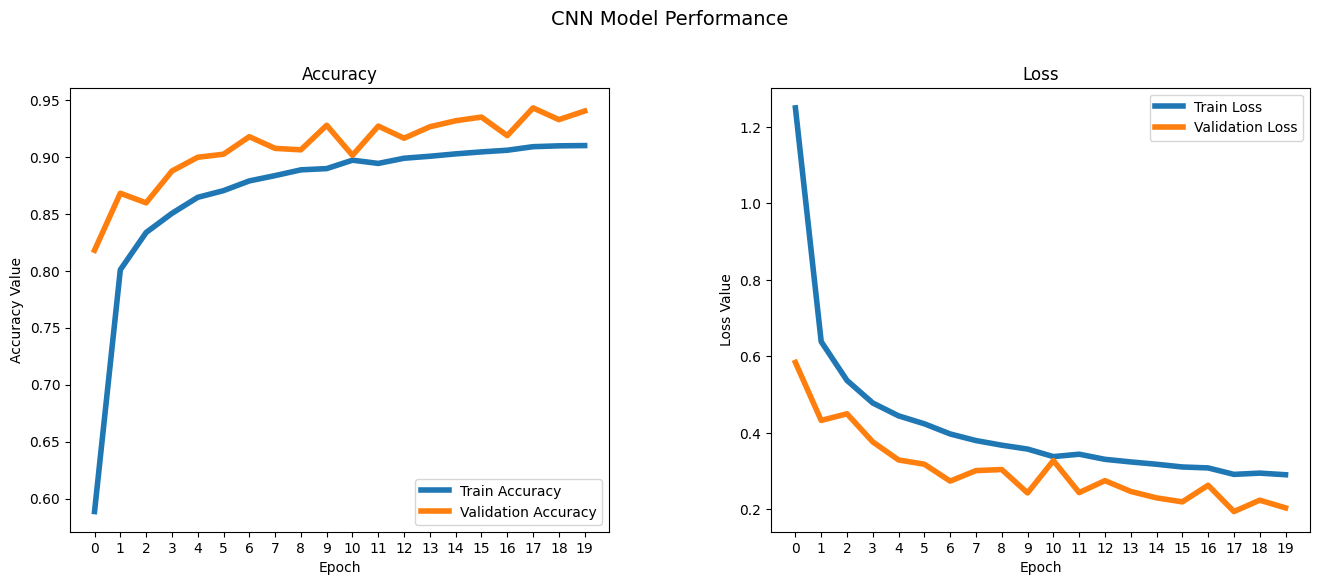

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history1.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history1.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [35]:
model1_scores = model1.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model1.metrics_names[1], model1_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9246 - loss: 0.2566
TEST SET: compile_metrics: 91.97%


In [36]:
test_predictions1 = model1.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


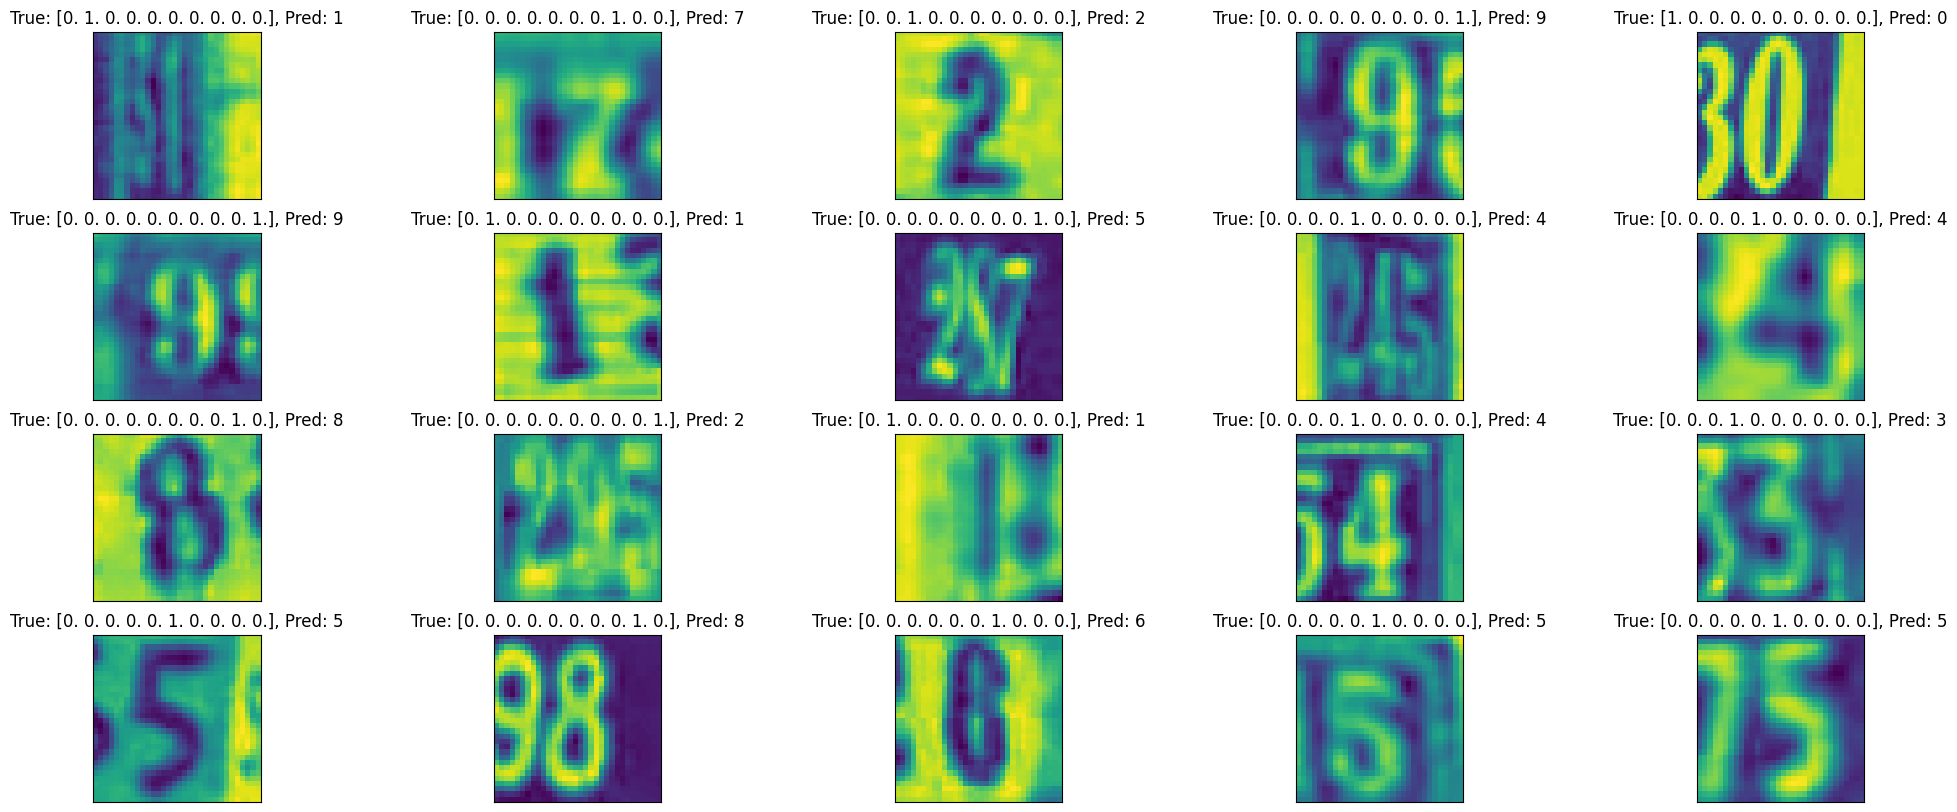

In [37]:
plot_images(x_test, y_test, 4, 5, test_predictions1)

## 8.5. 3rd Model After Increase Conv Layer

In [38]:
keras.backend.clear_session()

model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(32, (3, 3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),    
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(10 ,  activation='softmax')
])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,818 (1.69 MB)

 Trainable params: 443,370 (1.69 MB)

 Non-trainable params: 448 (1.75 KB)

In [39]:
model2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [58]:
history2 = model2.fit(x=x_train, y=y_train,
                   validation_data=(x_val, y_val),
                   batch_size=32,
                   epochs=20,
                   verbose=1)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9704 - loss: 0.1065 - val_accuracy: 0.9631 - val_loss: 0.1407
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9689 - loss: 0.1100 - val_accuracy: 0.9704 - val_loss: 0.1207
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9705 - loss: 0.1079 - val_accuracy: 0.9679 - val_loss: 0.1259
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9712 - loss: 0.1019 - val_accuracy: 0.9638 - val_loss: 0.1384
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9737 - loss: 0.0935 - val_accuracy: 0.9679 - val_loss: 0.1259
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9732 - loss: 0.0942 - val_accuracy: 0.9750 - val_loss: 0.1092
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9740 - loss: 0.0909 - val_accuracy: 0.9598 - val_loss: 0.1570
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9762 - loss: 0.0857 - 

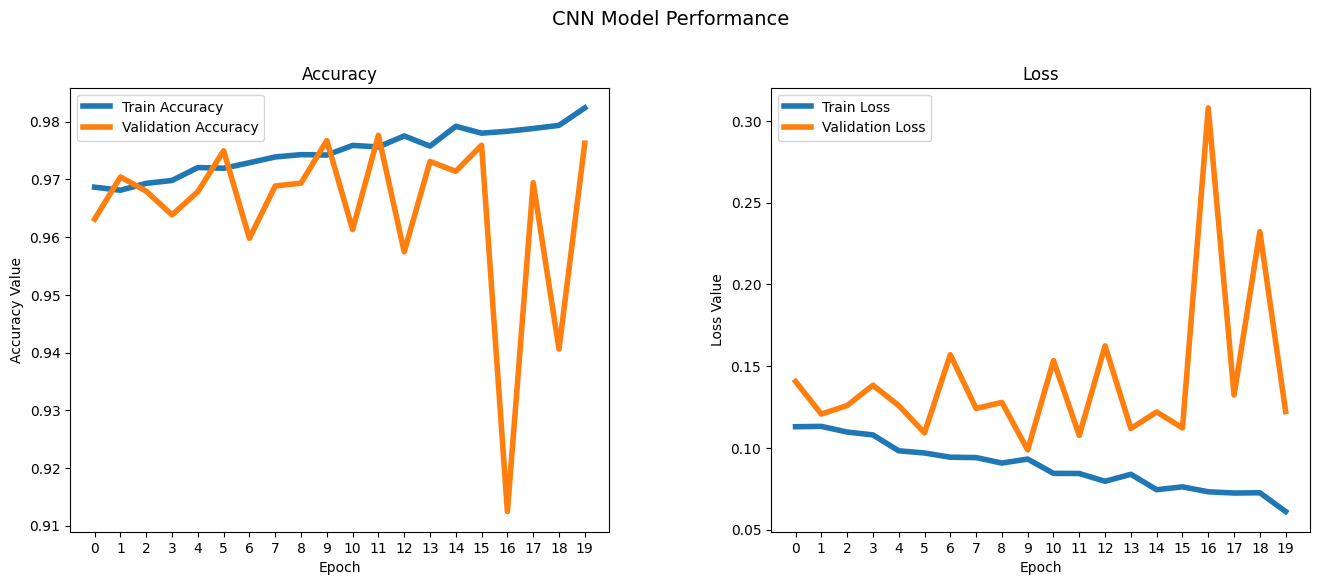

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [60]:
model2_scores = model2.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (model2.metrics_names[1], model2_scores[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.3092
TEST SET: compile_metrics: 94.16%


In [61]:
test_predictions2 = model2.predict(x_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


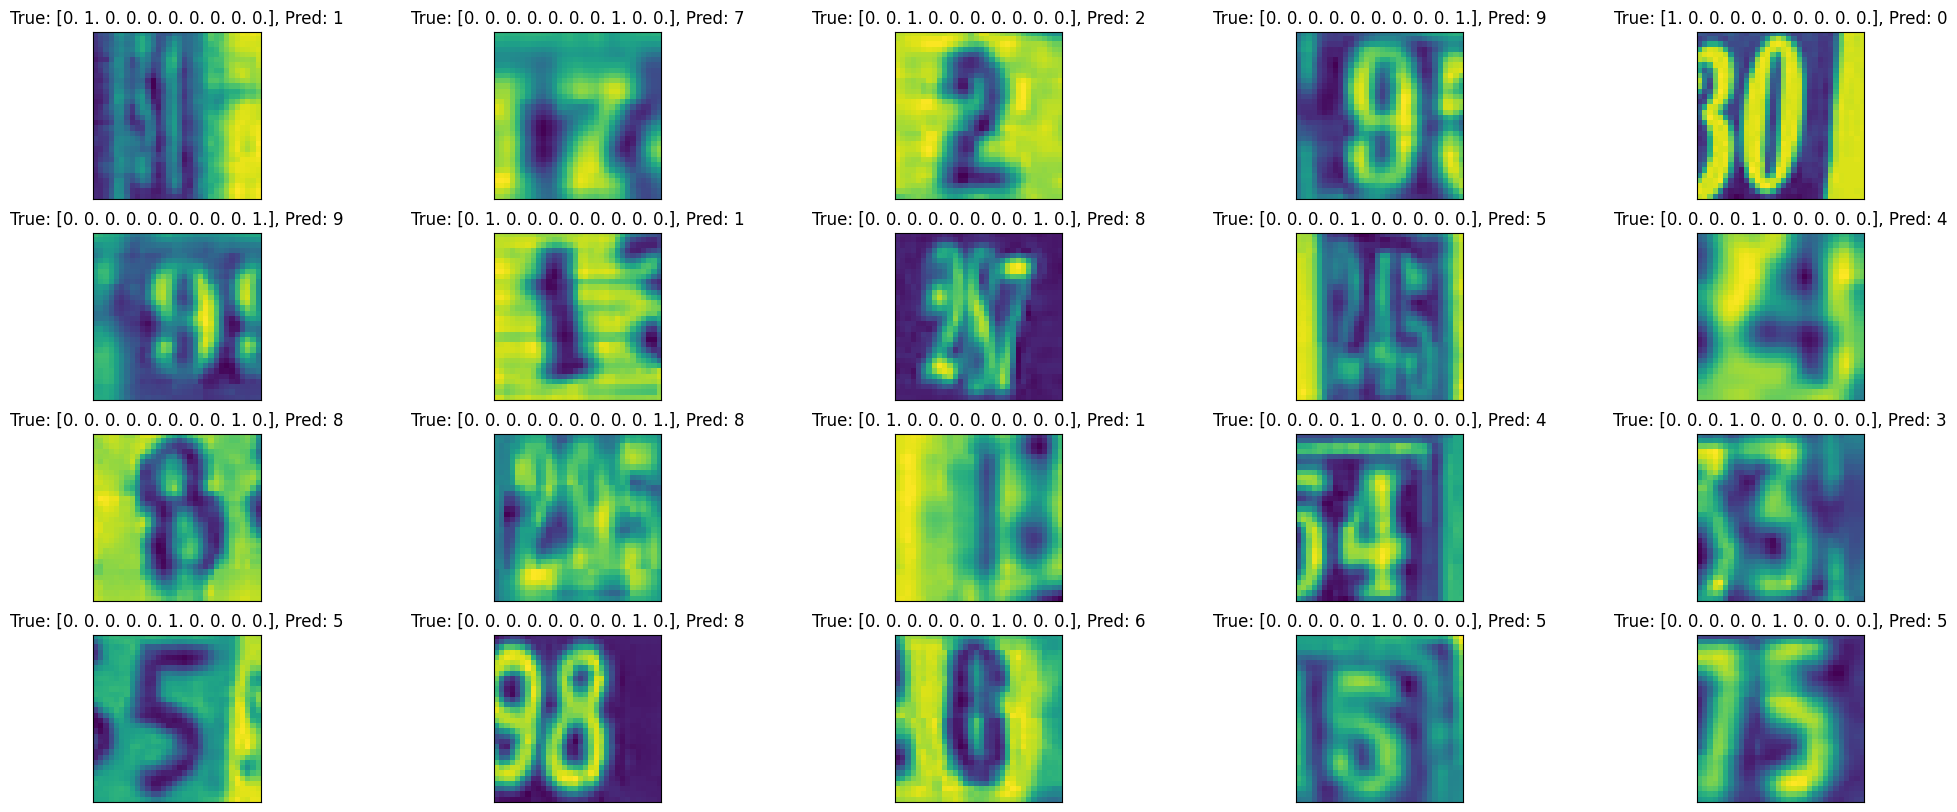

In [62]:
plot_images(x_test, y_test, 4, 5, test_predictions2)

<a id="Best_Model"></a>
# 9. Best Model's Accuracy and loss visualization:

<p><mark style="background-color: white; color: black;"><font size="4"> To visualize the accuracy and loss of a neural network during training, we use the history object returned by the fit method of the model. The history object contains the training and validation accuracy and loss for each epoch.</font></mark ></p>

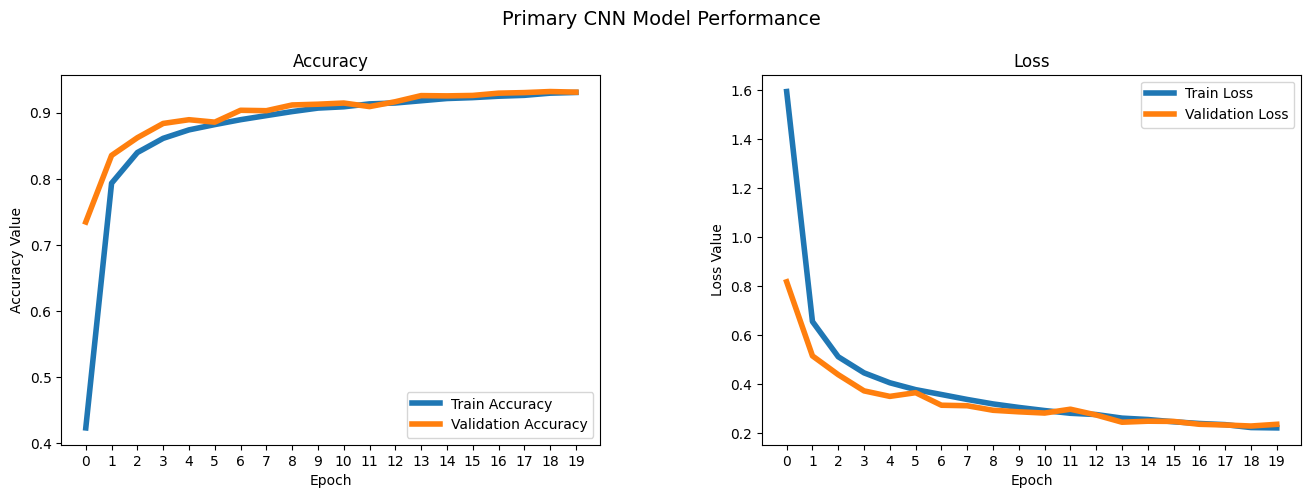

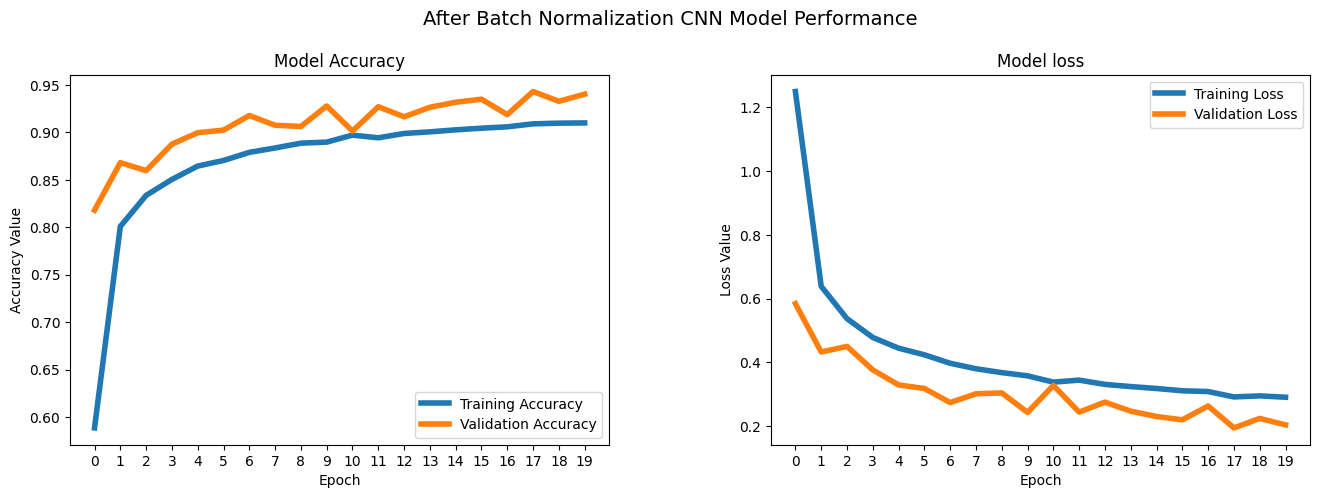

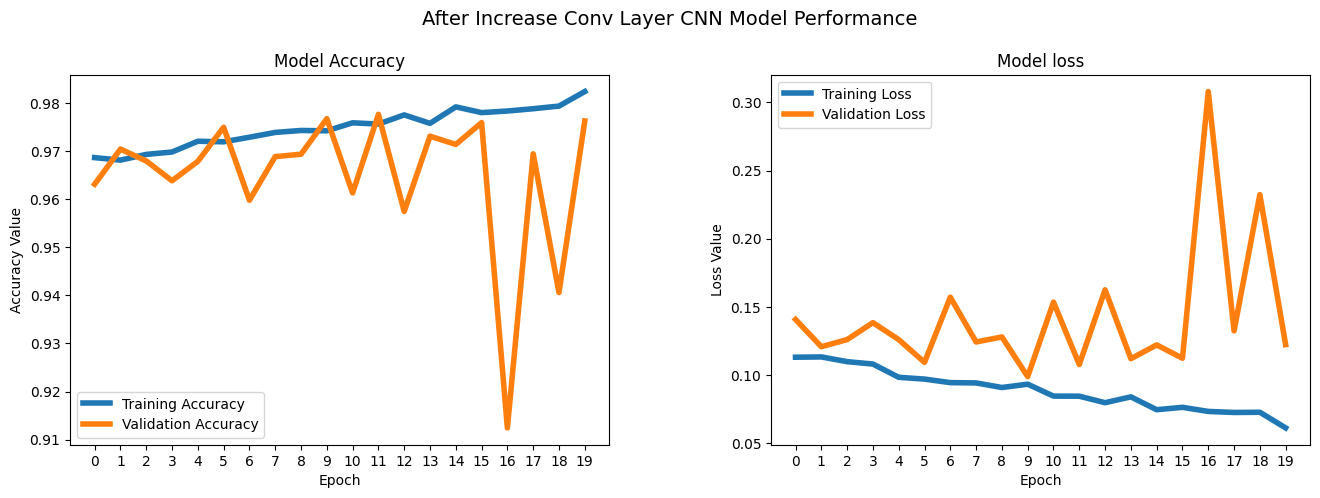

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('Primary CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# Plot the training and validation accuracy

epoch_list = list(range(0,20))
ax1.plot(epoch_list, primary_model_history.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, primary_model_history.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, primary_model_history.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, primary_model_history.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('After Batch Normalization CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Plot the training and validation accuracy
epoch_list = list(range(0,20))
ax3.plot(epoch_list, history1.history['accuracy'], label='Training Accuracy', linewidth=4)
ax3.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax3.set_xticks(np.arange(0, 20))
ax3.set_ylabel('Accuracy Value')
ax3.set_xlabel('Epoch')
ax3.set_title('Model Accuracy')

l3 = ax3.legend(loc="best")

# Plot the training and validation loss

ax4.plot(epoch_list, history1.history['loss'], label='Training Loss',linewidth=4)
ax4.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax4.set_xticks(np.arange(0, 20))
ax4.set_ylabel('Loss Value')
ax4.set_xlabel('Epoch')
ax4.set_title('Model loss')
l4 = ax4.legend(loc="best")

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 5))
title = fig.suptitle('After Increase Conv Layer CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax5.plot(epoch_list, history2.history['accuracy'], label='Training Accuracy', linewidth=4)
ax5.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax5.set_xticks(np.arange(0, 20))
ax5.set_ylabel('Accuracy Value')
ax5.set_xlabel('Epoch')
ax5.set_title('Model Accuracy')

l5 = ax5.legend(loc="best")

# Plot the training and validation loss

ax6.plot(epoch_list, history2.history['loss'], label='Training Loss',linewidth=4)
ax6.plot(epoch_list, history2.history['val_loss'], label='Validation Loss',linewidth=4)
ax6.set_xticks(np.arange(0, 20))
ax6.set_ylabel('Loss Value')
ax6.set_xlabel('Epoch')
ax6.set_title('Model loss')
l6 = ax6.legend(loc="best")

In [64]:
model2_Train_score=model2.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (model2.metrics_names[1], model2_Train_score[1]*100))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0304
TRAIN SET: compile_metrics: 99.11%


<a id="Model_Save"></a>
# 10. Model Save, load and Confusion Matrix analysis

In [65]:
model2.save('SVHN_Model_CNN.h5')

In [66]:
SVHN_Model = load_model('/kaggle/working/SVHN_Model_CNN.h5')

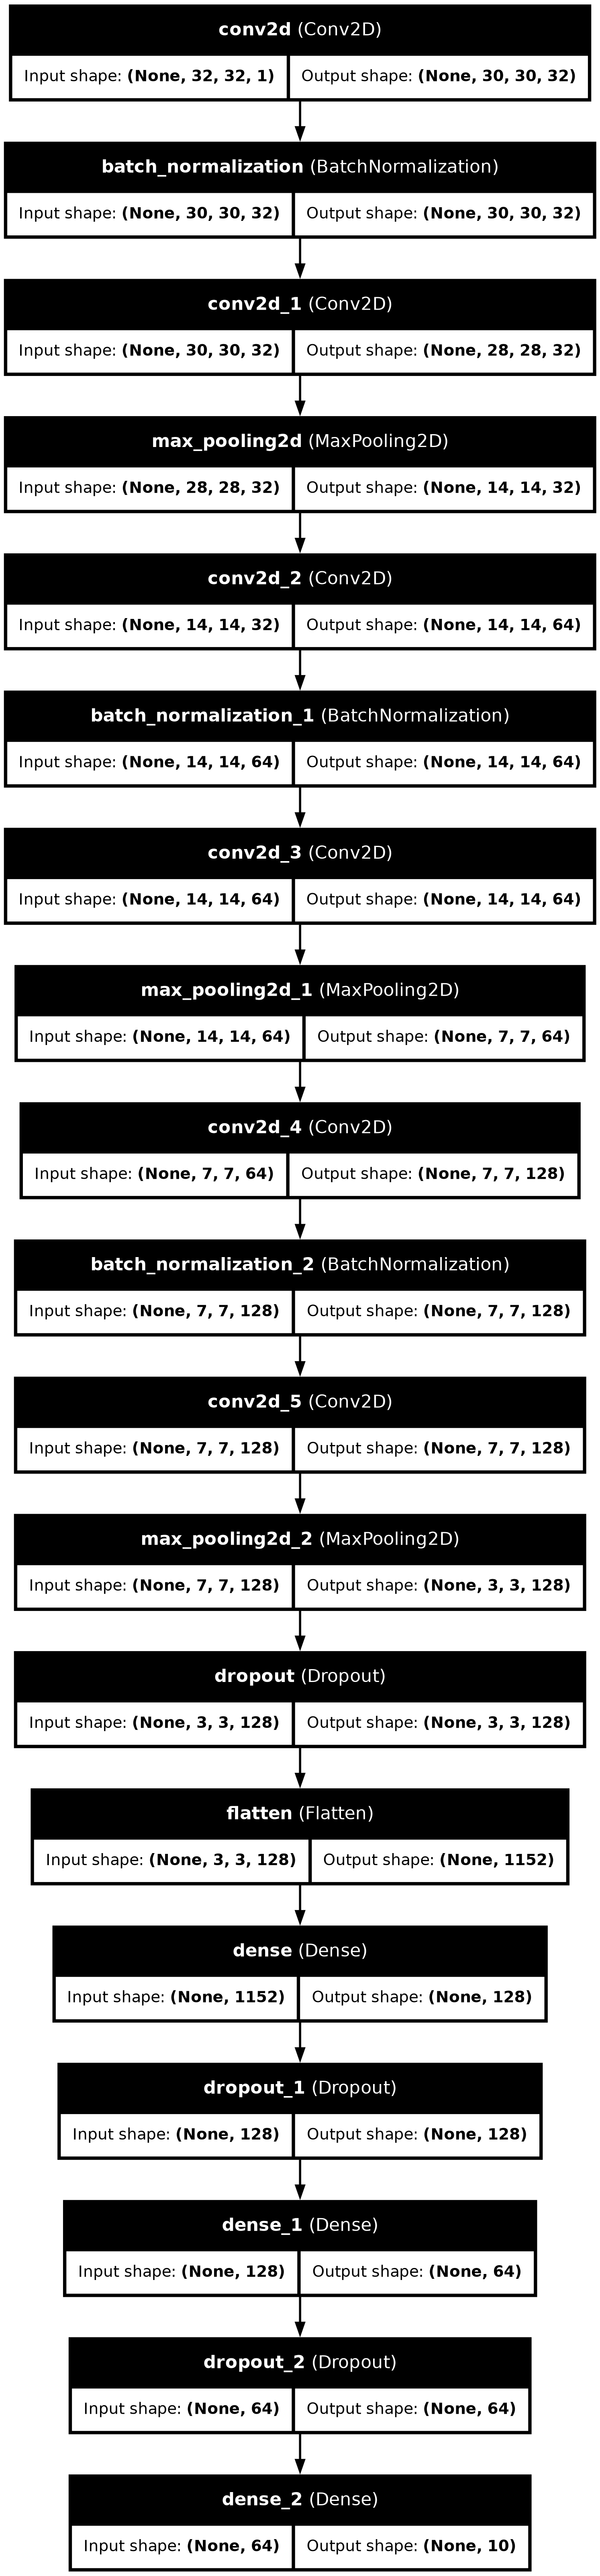

In [67]:
plot_model(SVHN_Model,
          'SVHN_Model_CNN.h5.png',
          show_shapes=True,
          show_layer_names=True)

In [68]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_train, y_train)
print("TRAIN SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0304
TRAIN SET: compile_metrics: 99.11%


In [69]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_test, y_test)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.3092
TEST SET: compile_metrics: 94.16%


In [70]:
SVHN_Model_Train_score=SVHN_Model.evaluate(x_val, y_val)
print("TEST SET: %s: %.2f%%" % (SVHN_Model.metrics_names[1], SVHN_Model_Train_score[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.1465
TEST SET: compile_metrics: 97.63%


In [71]:
# Getting model predictions
SVHN_Model_predictions = SVHN_Model.predict(x_test)
preds = np.argmax(SVHN_Model_predictions, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [72]:
np.argmax(SVHN_Model_predictions)

17

In [73]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(SVHN_Model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix
[[1749   10    4    4    7    1   20    3    4   12]
 [  23 1616   17   28   70    7   12   34   16    5]
 [   7    5 1706   10   19    4    4   15   14   19]
 [   2    7    6 1609    5   41   16    8   24    1]
 [   6    6    8    4 1749    5   11    0   16    7]
 [   1    7    2   29    4 1689   21    1    8    6]
 [  10    3    5   11   12   25 1727    1   33    5]
 [   5   23   20   23   11    4    4 1706    5    7]
 [  12    6    5   15    5    5   46    1 1698   19]
 [  25    5   11   13    5   13    7    5   20 1700]]


In [74]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1814
           1       0.96      0.88      0.92      1828
           2       0.96      0.95      0.95      1803
           3       0.92      0.94      0.93      1719
           4       0.93      0.97      0.95      1812
           5       0.94      0.96      0.95      1768
           6       0.92      0.94      0.93      1832
           7       0.96      0.94      0.95      1808
           8       0.92      0.94      0.93      1812
           9       0.95      0.94      0.95      1804

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



### Plotting Confusion Matrix

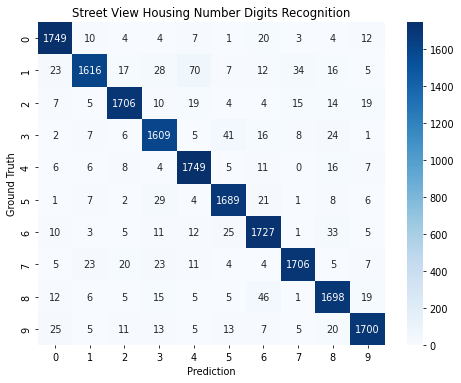

In [75]:
# Defining labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# To evaluate the accuracy of the classification
cnf = confusion_matrix(y_test_arg, y_pred)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Street View Housing Number Digits Recognition')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

<a id="conclusion"></a>
# 11. Conclusion

* <p><mark style="background-color: white; color: black;"><font size="4"> 
    In conclusion, our evaluation of the CNN model shows promising results on the image classification task. The model achieved an accuracy of 94%, precision of 94%, recall of 94%, and an F1 score of 94%. It performed particularly well on classifying objects in the validation set, with an accuracy of 96.90%.</font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4"> 
    However, there are still some limitations in the model. It struggled with classifying images that contained multiple objects, and it didn't perform as well on the test set, which had images that were not seen during training.</font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4">
    In future work, we plan to improve the model's performance by fine-tuning the architecture, experimenting with different image preprocessing techniques, and incorporating more data to the training set. </font></mark ></p>

* <p><mark style="background-color: white; color: black;"><font size="4">
    Despite these limitations, the model has shown great potential for real-world applications and we believe it could be a valuable tool for solving complex image classification problems.</font></mark ></p>